In [5]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import glob
import json

In [6]:
### Font

In [7]:
font = {'family': 'arial',
        'color':  'black',
        'weight': 'bold',
        'size': 16,
        }

font = {'family': 'DejaVu Sans',
        'color':  'black',
        'size': 16,
        }

## defined fundtions

### directories

In [8]:
out_img_dir = "./graphs/"
out_data_dir = "./results/"
in_data_dir = "./data/periodic/"

#### signatures

In [9]:
all_signatures = ['sq_lattice_site_percolation_non_periodic_',
                  'sq_lattice_site_percolation_periodic_',

                  'sq_lattice_site_percolation_ballistic_deposition_L1_non_periodic_',
                  'sq_lattice_site_percolation_ballistic_deposition_L1_periodic_',

                  'sq_lattice_site_percolation_ballistic_deposition_L2_non_periodic_',
                  'sq_lattice_site_percolation_ballistic_deposition_L2_periodic_']

In [10]:
signature = all_signatures[1]
files = glob.glob(in_data_dir + signature + '_[000-999]*')

# print("chosen signature")
print(signature)

sq_lattice_site_percolation_periodic_


In [11]:
files

['./data/periodic/sq_lattice_site_percolation_periodic__350_2018.6.28_17.42.50.txt',
 './data/periodic/sq_lattice_site_percolation_periodic__400_2018.6.30_7.51.51.txt',
 './data/periodic/sq_lattice_site_percolation_periodic__350_2018.6.29_14.55.27.txt',
 './data/periodic/sq_lattice_site_percolation_periodic__250_2018.6.26_0.18.11.txt',
 './data/periodic/sq_lattice_site_percolation_periodic__100_2018.6.20_15.30.36.txt',
 './data/periodic/sq_lattice_site_percolation_periodic__250_2018.6.20_23.19.29.txt',
 './data/periodic/sq_lattice_site_percolation_periodic__300_2018.6.27_8.27.31.txt',
 './data/periodic/sq_lattice_site_percolation_periodic__350_2018.6.28_17.42.52.txt',
 './data/periodic/sq_lattice_site_percolation_periodic__400_2018.6.30_10.10.19.txt',
 './data/periodic/sq_lattice_site_percolation_periodic__200_2018.6.20_15.7.15.txt',
 './data/periodic/sq_lattice_site_percolation_periodic__300_2018.6.26_4.38.42.txt',
 './data/periodic/sq_lattice_site_percolation_periodic__150_2018.6.20_

### defined constants

In [12]:
pc = 0.5927
one_by_nu = 0.75

In [13]:
data = dict()
ensembles = dict()
for file in files:
    f = open(file)
    l = f.readline()
    print(l)
    header = json.loads(l)
#     print(header)
    L = int(header['length'])
    ensmbl = int(header['ensemble_size'])
    if L in ensembles:
        ensembles[L] += ensmbl
    else:
        ensembles[L] = ensmbl

    p, H = np.loadtxt(file, usecols=(0,1), skiprows=1, unpack=True)
    
    if L in data:
        data[L] += ensmbl*np.array([p, H]).T
    else:
        data[L] = ensmbl*np.array([p, H]).T
        
    pass

        
#### taking average
for L in ensembles.keys():
    data[L] = data[L]/ensembles[L]      
    pass

{"length":350, "ensemble_size":5000, "signature":"sq_lattice_site_percolation_periodic_"}

{"length":400, "ensemble_size":10000, "signature":"sq_lattice_site_percolation_periodic_"}

{"length":350, "ensemble_size":10000, "signature":"sq_lattice_site_percolation_periodic_"}

{"length":250, "ensemble_size":10000, "signature":"sq_lattice_site_percolation_periodic_"}

{"length":100, "ensemble_size":20000, "signature":"sq_lattice_site_percolation_periodic_"}

{"length":250, "ensemble_size":20000, "signature":"sq_lattice_site_percolation_periodic_"}

{"length":300, "ensemble_size":10000, "signature":"sq_lattice_site_percolation_periodic_"}

{"length":350, "ensemble_size":5000, "signature":"sq_lattice_site_percolation_periodic_"}

{"length":400, "ensemble_size":10000, "signature":"sq_lattice_site_percolation_periodic_"}

{"length":200, "ensemble_size":20000, "signature":"sq_lattice_site_percolation_periodic_"}

{"length":300, "ensemble_size":10000, "signature":"sq_lattice_site_percolation_per

## With Standard Deviation

In [10]:
# data = dict()
# deviation_data = dict()
# ensembles = dict()
# for file in files:
#     f = open(file)
#     l = f.readline()
    
#     header = json.loads(l)
#     print(header)
#     L = int(header['length'])
#     ensmbl = int(header['ensemble_size'])
#     if L in ensembles:
#         ensembles[L] += ensmbl
#     else:
#         ensembles[L] = ensmbl

#     p, H = np.loadtxt(file, usecols=(0,1), skiprows=1, unpack=True)
#     a = H.reshape(H.shape[0], 1)

#     if L in data:
#         data[L] += ensmbl*np.array([p, H]).T        
#         deviation_data[L] = np.append(deviation_data[L], a, axis=1)
# #         print(deviation_data[L])
# #         break
#     else:
#         data[L] = ensmbl*np.array([p, H]).T
#         deviation_data[L] = a
        
#     pass


# #### taking average
# for L in ensembles.keys():
#     data[L] = data[L]/ensembles[L]      
#     pass

In [11]:
# L = 400
# print(deviation_data[L].shape)
# e = np.std(deviation_data[L], axis=1)
# print(e.shape)
# p = np.linspace(0, 1, L**2)
# plt.plot(p, e)

# c = np.linspace(0, L**2-1, 10, dtype=int)
# plt.plot(p[c], e[c])
# plt.title('Standard Deviation')
# plt.xlabel('p')
# plt.ylabel('std(P)')
# print(np.max(e))

In [12]:
# H = data[L][:,1]
# print(H.shape)
# print(p.shape)
# print(e.shape)
# plt.plot(p, H)
# plt.errorbar(p[c], H[c], e[c], linestyle='None', marker='^')

### checking ensemble sizes

In [14]:
ensembles

{350: 20000,
 400: 20000,
 250: 30000,
 100: 20000,
 300: 20000,
 200: 20000,
 150: 20000}

In [15]:
lengths = np.arange(200, 450, 50)

### Output Graphs

/home/shahnoor/software/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  


./graphs/sq_lattice_site_percolation_periodic_-entropy.eps


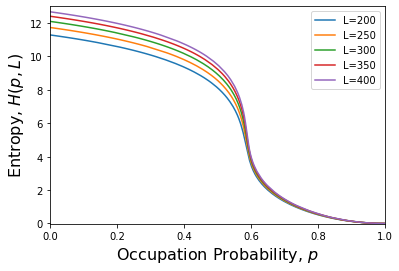

In [17]:
# fig = plt.figure(figsize=(5,5), dpi=300)

for L in lengths:
    x, y = data[L].T
    plt.plot(x, y, label='L={}'.format(L))
    
    pass

plt.legend()
plt.xlim(0, 1)
plt.ylim(-0.02, 13)
plt.xlabel(r'Occupation Probability, $p$', font)
plt.ylabel(r"Entropy, $H(p,L)$", font)
fig.tight_layout(pad=0.7)
filename = out_img_dir + signature + '-entropy.eps'
print(filename)
# plt.savefig(filename)

./graphs/sq_lattice_site_percolation_ballistic_deposition_L2_periodic_-entropy-reversed.pdf


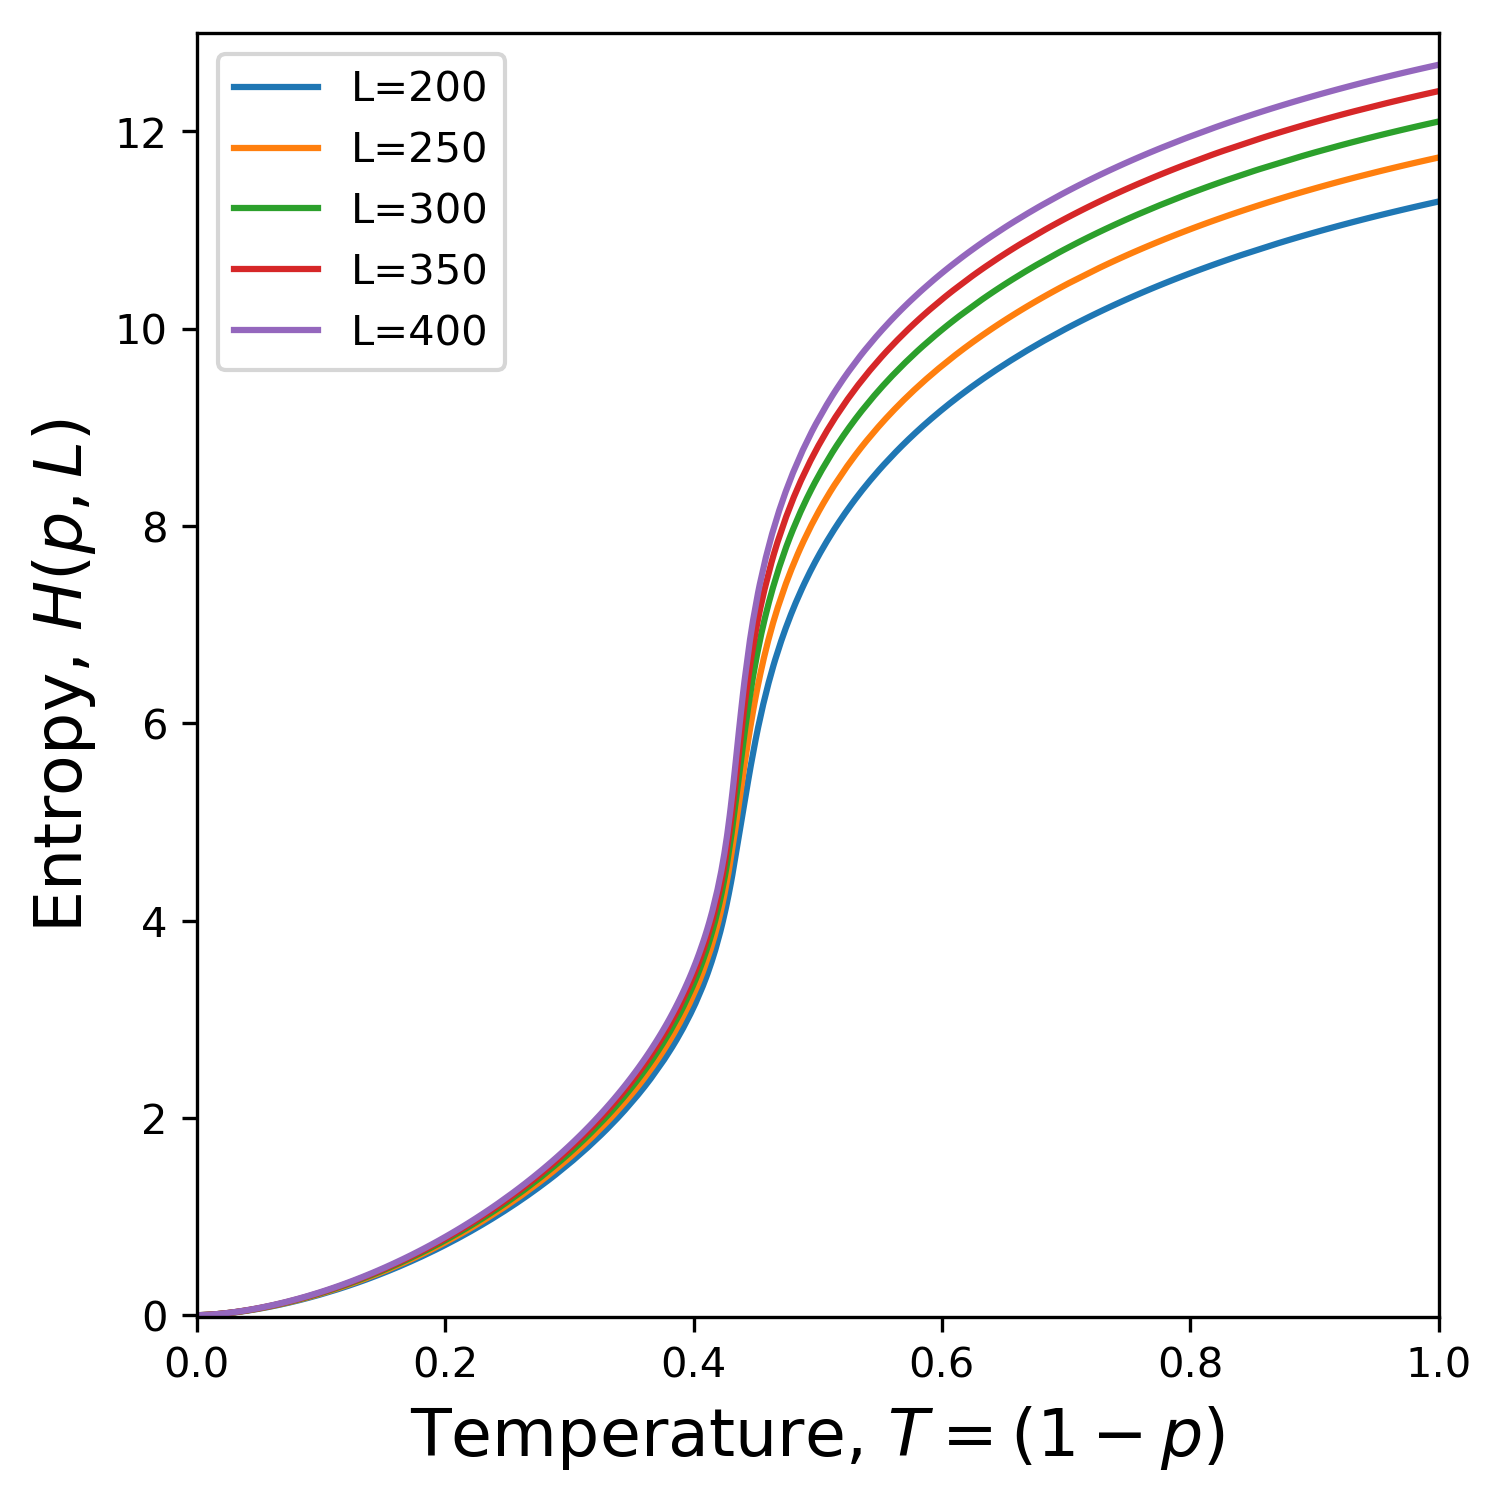

In [42]:
fig = plt.figure(figsize=(5,5), dpi=300)

for L in lengths:
    x, y = data[L].T
#     y = y[::-1]
    x = x[::-1]
#     x = 1 - x
#     print(x)
    plt.plot(x, y, label='L={}'.format(L))
    
    pass

plt.legend()
plt.xlim(0, 1)
plt.ylim(-0.02, 13)
plt.xlabel(r'Temperature, $T=(1-p)$', font)
plt.ylabel(r"Entropy, $H(p,L)$", font)
fig.tight_layout(pad=0.7)
filename = out_img_dir + signature + '-entropy-reversed.pdf'

print(filename)
plt.savefig(filename)
